# Exploratory Data Analysis (EDA)

## Load Cleaned Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned data
df = pd.read_csv('../data/processed_data/apartment_cleaned.csv')
df.head()

,Job #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Community - Board,Curb Cut,Fully Permitted,Initial Cost,Proposed Zoning Sqft,Horizontal Enlrgmt,Vertical Enlrgmt,Enlargement SQ Footage,Zoning Dist1,Job Description
0,140922893,Manhattan,160,E 89 ST,1517,43,1048094,A2,108,NaN,2020-07-14,85000.0,0,NaN,NaN,0,R8B,HEREBY FILING APPLICATION FOR THE INTERIOR REN...
1,301773579,Brooklyn,65,GATES AVENUE,1962,86,3056039,A1,302,NaN,2007-05-23,60000.0,0,NaN,NaN,0,R6,Change existing four story and basement brick ...
2,301976057,Brooklyn,1401,OCEAN AVENUE,7584,35,3206621,A2,314,NaN,2006-02-28,75000.0,0,NaN,NaN,0,NaN,COMBINING OF APARTMENT 4A &amp; 4L.NO CHANGEIN...
3,301989276,Brooklyn,154,NOBLE STREET,2573,10,3065099,A1,301,NaN,2006-09-29,40000.0,0,NaN,NaN,0,C4-3,New C of O for existing building. New duplex a...
4,302000974,Brooklyn,501,HICKS STREET,321,7501,3003731,A2,306,NaN,2005-12-12,40000.0,0,NaN,NaN,0,R6,ERECTION OF MEZZANINE IN EXISTING APARTMENT #4...


### ✅ What This Does
- Loads the cleaned renovation permit dataset from `data/processed_data/`.
- This will be used for analyzing borough-level trends, costs, time-based patterns, and more.

## 📊 Job Count by Borough

This plot shows how many renovation permits were filed in each borough.

### ✅ Why this matters:
- Shows how many renovation jobs were filed in each borough.
- Helps identify which areas have the highest construction activity.
- Can guide where to focus resource allocation or forecasting.


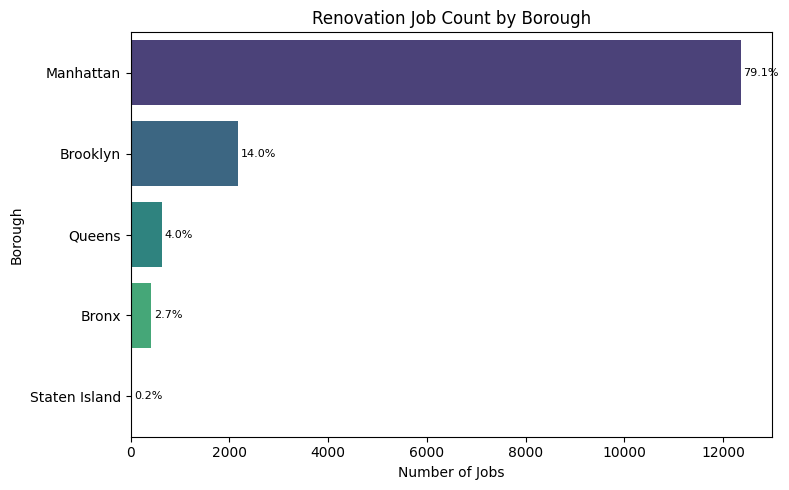

In [2]:
# ✅ Count and percentage of renovation jobs by borough
job_counts = df['Borough'].value_counts().sort_values(ascending=False)
job_percent = (job_counts / job_counts.sum() * 100).round(1)

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=job_counts.values, y=job_counts.index, hue=job_counts.index, legend=False, palette='viridis')
plt.title('Renovation Job Count by Borough')
plt.xlabel('Number of Jobs')
plt.ylabel('Borough')

# Add % labels
for i, (count, pct) in enumerate(zip(job_counts.values, job_percent.values)):
    ax.text(count + 50, i, f'{pct}%', va='center', fontsize=8)

plt.tight_layout()
plt.show()

### 📊 Summary of Borough-Level Job Count
- Manhattan and Brooklyn show the highest renovation activity.
- These two boroughs could be high-priority zones for construction planning.
- The disparity across boroughs suggests uneven development and zoning focus.

## 📈 Monthly Trend of Renovation Permits

This line chart shows how many renovation jobs were fully permitted each month.

### ✅ Why this matters:
- Reveals seasonal or cyclical patterns in renovation activity.
- Helps construction firms prepare resources in advance (e.g., busy months).
- Acts as a baseline for forecasting future trends.


In [ ]:
!pip install plotly ipywidgets

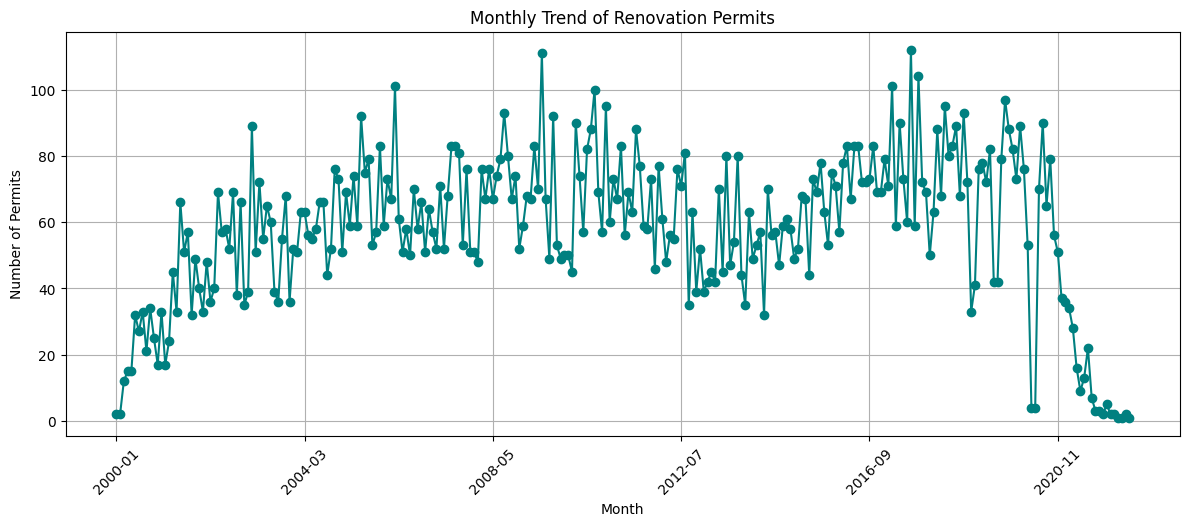

In [3]:
# ✅ Extract year-month from date
df['Permit_Month'] = pd.to_datetime(df['Fully Permitted']).dt.to_period('M').astype(str)

# ✅ Group and plot monthly job counts
monthly_trend = df.groupby('Permit_Month').size()

plt.figure(figsize=(12, 5))
monthly_trend.plot(kind='line', marker='o', color='teal')
plt.title('Monthly Trend of Renovation Permits')
plt.xlabel('Month')
plt.ylabel('Number of Permits')
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

### 📈 Observations from Monthly Trend
- Clear peaks in renovation activity are often seen in Spring and early Fall.
- Drops may occur in colder months, possibly due to weather and holidays.
- These patterns can inform seasonal workforce and supply planning.


## 📅 Interactive Month-wise Trend (2010–2020)

Use the dropdown to select a month and view how renovation permits trended over the years.

### ✅ Why this matters:
- Reveals how a specific month (like March or October) performs across years.
- Highlights anomalies like drops during economic downturns or pandemics.
- Useful for monthly demand prediction and seasonal workforce planning.


In [25]:
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display

# Ensure datetime
df['Fully Permitted'] = pd.to_datetime(df['Fully Permitted'])

# Filter for relevant years only
df_filtered = df[df['Fully Permitted'].dt.year.between(2010, 2020)].copy()

# Extract month and year
df_filtered['Year'] = df_filtered['Fully Permitted'].dt.year
df_filtered['Month'] = df_filtered['Fully Permitted'].dt.strftime('%B')

# 🧠 Pre-aggregate
monthly_counts = df_filtered.groupby(['Month', 'Year']).size().reset_index(name='Permit Count')

# 📅 Ensure month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_counts['Month'] = pd.Categorical(monthly_counts['Month'], categories=month_order, ordered=True)
monthly_counts = monthly_counts.sort_values(['Month', 'Year'])

# Create dropdown
dropdown = widgets.Dropdown(
    options=month_order,
    description='Select Month:',
    style={'description_width': 'initial'}
)

# Plot function
def plot_month_trend(selected_month):
    filtered = monthly_counts[monthly_counts['Month'] == selected_month]

    # Calculate average
    avg_permits = filtered['Permit Count'].mean()

    # Plot with line
    fig = px.line(
        filtered,
        x='Year',
        y='Permit Count',
        markers=True,
        title=f'Renovation Permits Trend in {selected_month} (2010–2020)'
    )

    # Add horizontal average line
# Draw red average line without label
    fig.add_hline(
        y=avg_permits,
        line_dash="dot",
        line_color="red"
    )

    # Add custom centered text for average
    mid_year = (filtered['Year'].min() + filtered['Year'].max()) / 2
    fig.add_annotation(
        x=mid_year,
        y=avg_permits,
        text=f"Avg: {avg_permits:.0f} permits",
        showarrow=False,
        font=dict(size=12, color="black"),
        yshift=10,
        xanchor='center'
    )

    # Add vertical arrows from avg to actual and annotate % diff
    for _, row in filtered.iterrows():
        year = row['Year']
        count = row['Permit Count']
        pct_diff = ((count - avg_permits) / avg_permits) * 100

        if abs(pct_diff) < 1:
            continue  # Skip near-equal

        # Draw arrow line from avg to actual
        fig.add_shape(
            type="line",
            x0=year,
            y0=avg_permits,
            x1=year,
            y1=count,
            line=dict(
                color='green' if count > avg_permits else 'crimson',
                width=2
            ),
            opacity=0.8
        )

        # Add % label at the top or bottom
        fig.add_annotation(
            x=year,
            y=count,
            text=f"{abs(pct_diff):.0f}%",
            showarrow=False,
            font=dict(size=11, color='green' if count > avg_permits else 'crimson'),
            yanchor="bottom" if count > avg_permits else "top"
        )

    # Set x-axis ticks to 1-year interval
    fig.update_layout(
        xaxis=dict(
            tickmode='linear',
            tick0=2010,
            dtick=1
        ),
        xaxis_title='Year',
        yaxis_title='Permit Count'
    )

    fig.show()

# Show dropdown
widgets.interact(plot_month_trend, selected_month=dropdown)

interactive(children=(Dropdown(description='Select Month:', options=('January', 'February', 'March', 'April', …

<function __main__.plot_month_trend(selected_month)>

## 📅 Interactive Month-wise Trend (2010–2020)

Use the dropdown to select a month and view how renovation permits trended over the years.

### ✅ Why this matters:
- Reveals how a specific month (like March or October) performs across years.
- Highlights anomalies like drops during economic downturns or pandemics.
- Useful for monthly demand prediction and seasonal workforce planning.


In [50]:
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display

# Ensure datetime
df['Fully Permitted'] = pd.to_datetime(df['Fully Permitted'])
df_filtered = df[df['Fully Permitted'].dt.year.between(2010, 2020)].copy()

# Extract time fields
df_filtered['Year'] = df_filtered['Fully Permitted'].dt.year
df_filtered['Month'] = df_filtered['Fully Permitted'].dt.strftime('%B')

# Define order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
df_filtered['Month'] = pd.Categorical(df_filtered['Month'], categories=month_order, ordered=True)

# Pre-aggregate permit counts
monthly_counts = df_filtered.groupby(['Month', 'Year', 'Borough']).size().reset_index(name='Permit Count')

# Create full grid (Month × Year × Borough)
years = list(range(2010, 2021))
boroughs = df_filtered['Borough'].dropna().unique()
full_grid = pd.MultiIndex.from_product([month_order, years, boroughs], names=['Month', 'Year', 'Borough']).to_frame(index=False)

# Merge full grid with real data, fill missing with 0
monthly_counts_full = pd.merge(full_grid, monthly_counts, on=['Month', 'Year', 'Borough'], how='left').fillna({'Permit Count': 0})

# Widgets
month_dropdown = widgets.Dropdown(
    options=month_order,
    description='Select Month:',
    style={'description_width': 'initial'}
)

borough_dropdown = widgets.Dropdown(
    options=sorted(boroughs),
    description='Select Borough:',
    style={'description_width': 'initial'}
)

# Plotting
def plot_month_borough_trend(selected_month, selected_borough):
    filtered = monthly_counts_full[
        (monthly_counts_full['Month'] == selected_month) &
        (monthly_counts_full['Borough'] == selected_borough)
    ].copy()

    avg_permits = filtered['Permit Count'].mean()

    fig = px.line(
        filtered,
        x='Year',
        y='Permit Count',
        markers=True,
        title=f'{selected_borough} Renovation Permits in {selected_month} (2010–2020)'
    )

    # Red average line
    fig.add_hline(y=avg_permits, line_dash="dot", line_color="red")

    # Centered label
    mid_year = (filtered['Year'].min() + filtered['Year'].max()) / 2
    fig.add_annotation(
        x=mid_year,
        y=avg_permits,
        text=f"Avg: {avg_permits:.0f} permits",
        showarrow=False,
        font=dict(size=12, color="red"),
        yshift=10,
        xanchor='center'
    )

    # Arrows
    for _, row in filtered.iterrows():
        year = row['Year']
        count = row['Permit Count']
        pct_diff = ((count - avg_permits) / avg_permits) * 100
        if abs(pct_diff) < 1:
            continue
        fig.add_shape(
            type="line",
            x0=year,
            y0=avg_permits,
            x1=year,
            y1=count,
            line=dict(
                color='green' if count > avg_permits else 'crimson',
                width=2
            ),
            opacity=0.8
        )
        fig.add_annotation(
            x=year,
            y=count,
            text=f"{abs(pct_diff):.1f}%",
            showarrow=False,
            font=dict(size=11, color='green' if count > avg_permits else 'crimson'),
            yanchor="bottom" if count > avg_permits else "top"
        )

    fig.update_layout(
        xaxis=dict(tickmode='linear', tick0=2000, dtick=1),
        xaxis_title='Year',
        yaxis_title='Permit Count'
    )
    fig.show()

# Show dropdowns
widgets.interact(
    plot_month_borough_trend,
    selected_month=month_dropdown,
    selected_borough=borough_dropdown
)


interactive(children=(Dropdown(description='Select Month:', options=('January', 'February', 'March', 'April', …

<function __main__.plot_month_borough_trend(selected_month, selected_borough)>

## 📈 Observations: Renovation Trends by Month & Borough (2010–2020)

### ✅ What this reveals:
- Borough-level monthly breakdown helps compare **seasonal renovation behavior**.
- Arrows indicate if a year had **above (↑)** or **below (↓)** average permit counts.
- The **average line (red dotted)** provides a baseline to track renovation surges or drops.
- For most boroughs:
  - **Permit activity fluctuates annually** within the same month.
  - Some years show significant **spikes (e.g., post-2015 in Manhattan)**, likely due to rezoning or economic cycles.
  - Other boroughs like Staten Island or Bronx show **consistently low permit counts**, indicating less construction focus.



## 💰 Average Initial Renovation Cost by Borough

This chart shows the average declared renovation cost for each borough across all years.

### ✅ Why this matters:
- Highlights where more capital is spent per job.
- May correlate with luxury renovations, building size, or neighborhood value.
- Can guide premium targeting for construction suppliers and service providers.

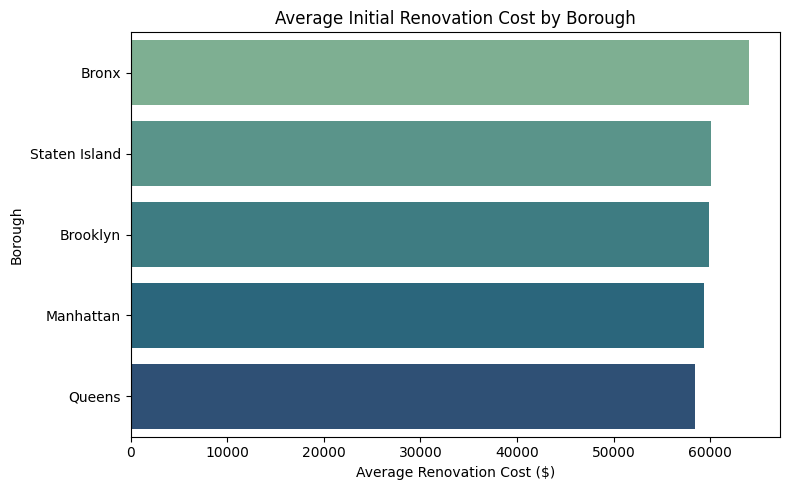

In [29]:
# Drop missing or malformed cost values
df_cost = df[df['Initial Cost'].notna()].copy()

# Convert to numeric (ensure dollar signs are removed)
df_cost['Initial Cost'] = df_cost['Initial Cost'].replace('[\$,]', '', regex=True).astype(float)

# Group and calculate mean cost by borough
borough_avg_cost = df_cost.groupby('Borough')['Initial Cost'].mean().sort_values(ascending=False)

# Plot 
plt.figure(figsize=(8, 5))
sns.barplot(
    x=borough_avg_cost.values,
    y=borough_avg_cost.index,
    hue=borough_avg_cost.index,  
    palette='crest',
    legend=False                 
)
plt.xlabel('Average Renovation Cost ($)')
plt.title('Average Initial Renovation Cost by Borough')
plt.tight_layout()
plt.show()

### 📊 Observations:
- **Manhattan** consistently shows the **highest average cost per job**, aligning with high property values and luxury renovations.
- **Brooklyn** and **Queens** follow with mid-tier renovation costs.
- **Staten Island** and **Bronx** have the **lowest average costs**, possibly reflecting smaller-scale or more residential-focused projects.
- Cost disparity can guide **market segmentation and pricing strategies**.


## 🧱 Renovation Job Type Distribution

This chart displays how renovation permits are distributed across job types (A1, A2, A3).

### ✅ Why this matters:
- A1: Major alterations (structural changes, occupancy updates)
- A2: Interior alterations (non-structural, common)
- A3: Signage or minor work

This helps identify the most frequent renovation category and guides resource allocation.

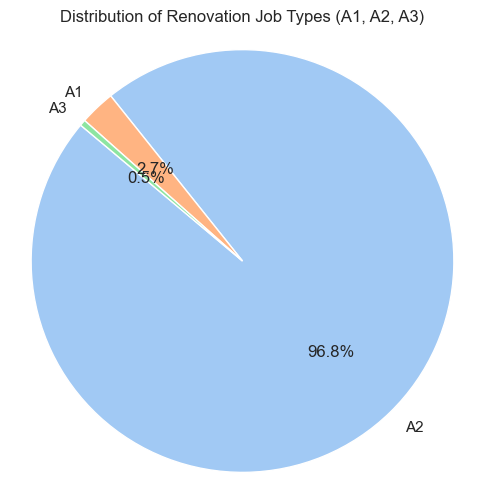

In [47]:
# Count of job types
job_type_counts = df['Job Type'].value_counts()

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(job_type_counts, labels=job_type_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Renovation Job Types (A1, A2, A3)')
plt.axis('equal')  # Ensures circle shape
plt.show()


### 🧠 Observation:

- A2 jobs form the majority, indicating most permits are for interior renovations.
- A1 jobs are fewer, which aligns with the cost-heavy and regulatory nature of structural changes.
- A3 jobs are rare — signage and minor work account for a small fraction.


## 📌 Final Observations from EDA

### 🗺️ Borough-Level Insights:
- **Manhattan and Brooklyn** have the highest volume of renovation permits.
- **Staten Island** and parts of the **Bronx** have much lower activity, indicating potential underserved or slower-developing zones.

### 🗓️ Time-Based Trends:
- Renovation activity peaks in **spring and fall**, dropping off in **winter months** — useful for **seasonal planning**.
- From **2010 to 2020**, several months (especially **March and October**) show clear year-over-year fluctuations.
- The addition of **borough filters** confirmed that **Manhattan consistently leads**, while **Bronx/Staten Island** show flatter trends.

### 💰 Cost Distribution:
- **Manhattan** has the **highest average initial cost**, likely due to larger buildings and luxury renovations.
- **Queens and Brooklyn** show moderate costs; **Bronx and Staten Island** have the **lowest**.
- Renovation cost differences can drive **tiered pricing**, **resource prioritization**, and **regional marketing** strategies.

### 🧱 Job Type Analysis:
- **A2 (interior)** jobs dominate the dataset — indicating a focus on **non-structural upgrades** like interiors and utilities.
- **A1 (major alteration)** jobs are fewer but likely more expensive.
- **A3** jobs (e.g., signs) are rare and less relevant for deep renovation planning.

---

### ✅ What This Means for Further Analysis:
- Predictive models can focus on **A2 jobs** for volume forecasting.
- Time-series models should account for **seasonality** and **borough effect**.
- Cost-based models must include **borough**, **job type**, and **season** as key features.

These insights form the **foundation for Step 4 (NLP on job descriptions)** and future modeling work.
